# Prueba Fundamentos de Data Science : Análisis de Ventas de Videojuegos en 2024

**Requisitos**

Tu tarea es limpiar y explorar un dataset que contiene información sobre las ventas de videojuegos en el año 2024. Este análisis es crucial para entender las tendencias de mercado y los factores que influyen en las ventas de videojuegos.

**Dataset**

- El dataset puede ser encontrado ![aquí](https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024)**
- La documentación puede ser encontrada ![aquí](https://www.kaggle.com/datasets/ashaheedq/video-games-sales-2019)

**Tareas a realizar**

Limpieza de datos con Python:

* Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Action’, ‘action’, ‘ACTION’).
* Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
* Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un videojuego con ventas negativas).

Exploración de datos con Python:
* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

Análisis adicional:

* Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.
* Análisis de correlación: Identifica y analiza las correlaciones más fuertes entre las variables del dataset.
* Predicción de ventas: Utiliza un modelo de regresión simple para predecir las ventas futuras basadas en los datos disponibles

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import re

In [2]:
path = '../data/kaggle/videojuegos/vgchartz-2024.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


## Limpieza de datos con Python

### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [3]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


### **Verificación y ajuste de tipos de datos**

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos

In [4]:
# Definir el diccionario de tipos de datos (excluyendo las fechas)
diccionario = {
    'img': 'string',
    'title': 'string',
    'console': 'string',
    'genre': 'string',
    'publisher': 'string',
    'developer': 'string',
    'critic_score': 'float64',
    'total_sales': 'float64',
    'na_sales': 'float64',
    'jp_sales': 'float64',
    'pal_sales': 'float64',
    'other_sales': 'float64',
    'release_date': 'date',
    'last_update': 'date'
}

# Función para mapear tipos personalizados a tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'string': 'string',
        'float64': 'float64',
        'date': 'datetime64[ns]'
    }
    return mapping.get(tipo_personalizado, 'object')  # 'object' como valor por defecto

# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario.items()}

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)

Diccionario Mapeado para pandas:
{'img': 'string', 'title': 'string', 'console': 'string', 'genre': 'string', 'publisher': 'string', 'developer': 'string', 'critic_score': 'float64', 'total_sales': 'float64', 'na_sales': 'float64', 'jp_sales': 'float64', 'pal_sales': 'float64', 'other_sales': 'float64', 'release_date': 'datetime64[ns]', 'last_update': 'datetime64[ns]'}


In [5]:
def validar_tipos(df, diccionario):
    """
    Valida que cada columna en df tenga el tipo de dato especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - mismatches: Lista de tuplas con (columna, tipo_actual, tipo_esperado) para discrepancias.
    """
    mismatches = []
    for columna, tipo_esperado in diccionario.items():
        if columna in df.columns:
            tipo_actual = str(df[columna].dtype)
            # Algunos dtypes pueden ser equivalentes pero diferentes en nombre
            # Por ejemplo, 'string' en pandas puede ser 'string[python]'
            # Comparar solo las partes relevantes
            if tipo_esperado.startswith('datetime') and tipo_actual.startswith('datetime'):
                continue  # Considerar igual si ambos son datetime
            elif tipo_actual != tipo_esperado:
                mismatches.append((columna, tipo_actual, tipo_esperado))
        else:
            mismatches.append((columna, 'No existe en el DataFrame', tipo_esperado))
    return mismatches

# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Discrepancias encontradas en los tipos de datos:
- Columna 'img': Tipo actual -> object, Tipo esperado -> string
- Columna 'title': Tipo actual -> object, Tipo esperado -> string
- Columna 'console': Tipo actual -> object, Tipo esperado -> string
- Columna 'genre': Tipo actual -> object, Tipo esperado -> string
- Columna 'publisher': Tipo actual -> object, Tipo esperado -> string
- Columna 'developer': Tipo actual -> object, Tipo esperado -> string
- Columna 'release_date': Tipo actual -> object, Tipo esperado -> datetime64[ns]
- Columna 'last_update': Tipo actual -> object, Tipo esperado -> datetime64[ns]


In [6]:
def corregir_tipos(df, diccionario):
    """
    Corrige los tipos de datos de las columnas en df según lo especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - df: DataFrame con tipos de datos corregidos.
    """
    for columna, tipo in diccionario.items():
        if columna in df.columns:
            try:
                if tipo == 'datetime64[ns]':
                    df[columna] = pd.to_datetime(df[columna], errors='coerce')
                else:
                    df[columna] = df[columna].astype(tipo)
            except Exception as e:
                print(f"Error al convertir la columna '{columna}' a '{tipo}': {e}")
    return df

# Corregir los tipos de datos
df = corregir_tipos(df, diccionario_mapeado)

# Volver a validar
mismatches_post = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados después de la corrección
if not mismatches_post:
    print("Todos los tipos de datos han sido corregidos correctamente.")
else:
    print("Aún existen discrepancias después de la corrección:")
    for columna, actual, esperado in mismatches_post:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")


Todos los tipos de datos han sido corregidos correctamente.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           64016 non-null  string        
 1   title         64016 non-null  string        
 2   console       64016 non-null  string        
 3   genre         64016 non-null  string        
 4   publisher     64016 non-null  string        
 5   developer     63999 non-null  string        
 6   critic_score  6678 non-null   float64       
 7   total_sales   18922 non-null  float64       
 8   na_sales      12637 non-null  float64       
 9   jp_sales      6726 non-null   float64       
 10  pal_sales     12824 non-null  float64       
 11  other_sales   15128 non-null  float64       
 12  release_date  56965 non-null  datetime64[ns]
 13  last_update   17879 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), string(6)
memory usage: 6.8 MB


### Consistencia en valores categóricos

Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Action’, ‘action’, ‘ACTION’).

In [8]:
# Lista de columnas categóricas a revisar
categorical_cols = ['console', 'genre', 'publisher', 'developer']
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Ruta donde se guardará el archivo JSON
ruta_json = '../data/kaggle/videojuegos/valores_unicos_iniciales.json'
# Guardar el diccionario en un archivo JSON
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"\nValores únicos guardados en '{ruta_json}'")



Valores únicos en la columna 'console':
['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS', 'DS', '2600', 'GBA', 'NES', 'XB', 'PSN', 'GEN', 'PSV', 'DC', 'N64', 'SAT', 'SNES', 'GBC', 'GC', 'NS', '3DS', 'GB', 'WiiU', 'WS', 'VC', 'NG', 'WW', 'SCD', 'PCE', 'XBL', '3DO', 'GG', 'OSX', 'Mob', 'PCFX', 'Series', 'All', 'iOS', '5200', 'And', 'DSiW', 'Lynx', 'Linux', 'MS', 'ZXS', 'ACPC', 'Amig', '7800', 'DSi', 'AJ', 'WinP', 'iQue', 'GIZ', 'VB', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'XS', 'PS5', 'Int', 'CV', 'Arc', 'C64', 'FDS', 'MSX', 'OR', 'C128', 'CDi', 'CD32', 'BRW', 'FMT', 'ApII', 'Aco', 'BBCM', 'TG16']

Valores únicos en la columna 'genre':
['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing', 'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform', 'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party', 'Education', 'Board Game', 'Visual Novel']

Valores únicos en la columna 'publisher':
['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts

In [9]:
def limpiar_cadena(cadena):
    """
    Limpia una cadena de texto realizando las siguientes operaciones:
    1. Convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última letra,
       pero mantiene los caracteres internos.
    
    Parámetros:
    - cadena (str): La cadena de texto a limpiar.
    
    Retorna:
    - str: La cadena limpia.
    """
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        
        # 2. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
        
        return cadena
    return cadena


# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)
# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())



Valores únicos después de limpieza en 'console':
['ps' 'x' 'xone' 'pc' 'psp' 'wii' 'ds' '2600' 'gba' 'nes' 'xb' 'psn' 'gen'
 'psv' 'dc' 'n' 'sat' 'snes' 'gbc' 'gc' 'ns' 'gb' 'wiiu' 'ws' 'vc' 'ng'
 'ww' 'scd' 'pce' 'xbl' 'do' 'gg' 'osx' 'mob' 'pcfx' 'series' 'all' 'ios'
 '5200' 'and' 'dsiw' 'lynx' 'linux' 'ms' 'zxs' 'acpc' 'amig' '7800' 'dsi'
 'aj' 'winp' 'ique' 'giz' 'vb' 'ouya' 'ngage' 'ast' 'msd' 's32x' 'xs'
 'int' 'cv' 'arc' 'c' 'fds' 'msx' 'or' 'cdi' 'cd' 'brw' 'fmt' 'apii' 'aco'
 'bbcm' 'tg']

Valores únicos después de limpieza en 'genre':
['action' 'shooter' 'action-adventure' 'sports' 'role-playing'
 'simulation' 'racing' 'music' 'misc' 'fighting' 'platform' 'adventure'
 'strategy' 'puzzle' 'mmo' 'sandbox' 'party' 'education' 'board game'
 'visual novel']

Valores únicos después de limpieza en 'publisher':
['rockstar games' 'activision' 'ea sports' ...
 "mind's eclipse interactive" 'walkabout' 'invertmouse']

Valores únicos después de limpieza en 'developer':
['rockstar north' 

In [10]:
# Guardar los valores únicos en un archivo JSON para referencia
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()
    valores_unicos[col] = unique_vals
# Guardar en 'valores_unicos.json'
with open('../data/kaggle/videojuegos/valores_unicos_finales.json', 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print("Valores únicos guardados en 'valores_unicos.json'.")

Valores únicos guardados en 'valores_unicos.json'.


### **Manejo de valores faltantes**

Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato

In [11]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,57338,89.57
jp_sales,6726,57290,89.49
na_sales,12637,51379,80.26
pal_sales,12824,51192,79.97
other_sales,15128,48888,76.37
last_update,17879,46137,72.07
total_sales,18922,45094,70.44
release_date,56965,7051,11.01
developer,63999,17,0.03
img,64016,0,0.00


#### **Estrategia 1: Rellenar valores faltantes en columnas categóricas**

In [13]:
#  Definir las columnas categóricas, numéricas y de fecha
categorical_cols = ['img', 'title', 'console', 'genre', 'publisher', 'developer']
numeric_cols = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
date_cols = ['release_date', 'last_update']
# Rellenar valores faltantes en columnas categóricas
df[categorical_cols] = df[categorical_cols].fillna('Desconocido')
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,57338,89.57
jp_sales,6726,57290,89.49
na_sales,12637,51379,80.26
pal_sales,12824,51192,79.97
other_sales,15128,48888,76.37
last_update,17879,46137,72.07
total_sales,18922,45094,70.44
release_date,56965,7051,11.01
img,64016,0,0.00
title,64016,0,0.00


#### Estrategia 2: **Identificar métricas con las cuales podemos hacer imputación que hagan sentido de negocio**

In [14]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['console', 'genre', 'publisher']
numeric_cols = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
# Filtrar el DataFrame para incluir solo filas sin valores faltantes en las columnas categóricas y numéricas
df_filtered = df.dropna(subset=categorical_cols + numeric_cols)
# Mostrar cuántas filas fueron eliminadas
num_original = df.shape[0]
num_filtrado = df_filtered.shape[0]
print(f"Filas originales: {num_original}")
print(f"Filas después de filtrar valores faltantes: {num_filtrado}")
print(f"Filas eliminadas: {num_original - num_filtrado}")
# Agrupar por las columnas categóricas y calcular la media, std, median y count
grouped_df = df_filtered.groupby(categorical_cols)[numeric_cols].agg(['mean', 'std', 'median', 'count'])
# Aplanar el MultiIndex de las columnas resultantes
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
# Restablecer el índice para convertir las columnas categóricas de nuevo en columnas normales
grouped_df = grouped_df.reset_index()
# Calcular el coeficiente de variación para cada variable numérica
for col in numeric_cols:
    std_col = f"{col}_std"
    mean_col = f"{col}_mean"
    cv_col = f"{col}_cv"
    # Evitar división por cero
    grouped_df[cv_col] = grouped_df[std_col] / grouped_df[mean_col].replace({0: pd.NA})
# Reemplazar NaN en coeficiente de variación con 0 o algún otro valor si es necesario
grouped_df.fillna({'critic_score_cv': 0,
                   'total_sales_cv': 0,
                   'na_sales_cv': 0,
                   'jp_sales_cv': 0,
                   'pal_sales_cv': 0,
                   'other_sales_cv': 0}, inplace=True)
# Guardar el DataFrame agrupado como un archivo CSV
grouped_df.to_csv('../data/kaggle/videojuegos/estadisticas_agrupadas_sin_NA.csv', index=False)
print("\nEstadísticas agrupadas guardadas en 'estadisticas_agrupadas_sin_NA.csv'.")
# Mostrar las primeras filas del DataFrame agrupado
print("\nPrimeras filas del DataFrame agrupado:")
grouped_df[grouped_df.critic_score_count>1]

Filas originales: 64016
Filas después de filtrar valores faltantes: 1210
Filas eliminadas: 62806

Estadísticas agrupadas guardadas en 'estadisticas_agrupadas_sin_NA.csv'.

Primeras filas del DataFrame agrupado:


/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_92299/432672256.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  grouped_df.fillna({'critic_score_cv': 0,


,console,genre,publisher,critic_score_mean,critic_score_std,critic_score_median,critic_score_count,total_sales_mean,total_sales_std,total_sales_median,...,other_sales_mean,other_sales_std,other_sales_median,other_sales_count,critic_score_cv,total_sales_cv,na_sales_cv,jp_sales_cv,pal_sales_cv,other_sales_cv
3,ds,action,capcom,7.250000,0.777817,7.25,2,0.5750,0.445477,0.575,...,0.030000,0.028284,0.030,2,0.107285,0.774743,0.655367,0.655367,1.187939,0.942809
5,ds,action,namco bandai,6.300000,0.848528,6.30,2,0.1750,0.021213,0.175,...,0.010000,0.000000,0.010,2,0.134687,0.121218,0.471405,0.471405,0.471405,0.000000
7,ds,action,nintendo,5.950000,0.494975,5.95,2,0.3250,0.247487,0.325,...,0.025000,0.021213,0.025,2,0.083189,0.761500,0.834023,0.353553,0.942809,0.848528
10,ds,action-adventure,konami digital entertainment,7.550000,0.494975,7.55,2,0.2750,0.162635,0.275,...,0.015000,0.007071,0.015,2,0.065560,0.591398,0.818755,0.761500,0.282843,0.471405
12,ds,action-adventure,nintendo,7.400000,2.404163,7.40,2,0.4050,0.219203,0.405,...,0.035000,0.021213,0.035,2,0.324887,0.541242,0.471405,0.108786,1.081457,0.606092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,x,sports,electronic arts,8.450000,0.353553,8.45,2,1.5150,0.601041,1.515,...,0.135000,0.063640,0.135,2,0.041841,0.396727,0.356252,0.000000,1.077967,0.471405
571,x,sports,k sports,8.725000,0.298608,8.70,4,2.2175,0.902714,2.375,...,0.165000,0.085049,0.150,4,0.034224,0.407086,0.387485,0.666667,0.640613,0.515449
579,x,strategy,ubisoft,8.000000,0.000000,8.00,2,0.5900,0.452548,0.590,...,0.055000,0.049497,0.055,2,0.000000,0.767031,0.929340,1.414214,0.525279,0.899954
590,xone,racing,microsoft studios,9.050000,0.212132,9.05,2,1.6800,0.226274,1.680,...,0.135000,0.021213,0.135,2,0.023440,0.134687,0.171420,0.000000,0.112494,0.157135


In [15]:
# filtro los datos donde tengo más de una observación
filtered_grouped_df = grouped_df[grouped_df['critic_score_count'] > 1]
# busco los datos de mediana y coeficiente de variación para entender su representatividad
median_cols = [f"{col}_median" for col in numeric_cols]
cv_cols = [f"{col}_cv" for col in numeric_cols]
selected_columns = categorical_cols + median_cols + cv_cols
selected_grouped_df = filtered_grouped_df[selected_columns]
selected_grouped_df.describe().T


,count,mean,std,min,25%,50%,75%,max
critic_score_median,216.0,7.575926,0.911438,5.100,7.000000,7.700000,8.250000,9.750000
total_sales_median,216.0,1.275625,1.532267,0.085,0.403750,0.680000,1.475000,11.835000
na_sales_median,216.0,0.593889,0.817840,0.020,0.160000,0.255000,0.672500,5.980000
jp_sales_median,216.0,0.100255,0.113320,0.000,0.020000,0.060000,0.126250,0.595000
pal_sales_median,216.0,0.421690,0.562812,0.000,0.073750,0.205000,0.508750,4.120000
other_sales_median,216.0,0.144954,0.212135,0.005,0.030000,0.070000,0.181250,1.465000
critic_score_cv,216.0,0.104819,0.078773,0.000,0.042855,0.089912,0.143377,0.553388
total_sales_cv,216.0,0.491541,0.285890,0.000,0.266999,0.476854,0.685331,1.463033
na_sales_cv,216.0,0.568858,0.312672,0.000,0.352469,0.581165,0.762693,1.487654
jp_sales_cv,216.0,0.614553,0.414164,0.000,0.299592,0.565685,0.859270,2.449490


#### **Decisión para imputar NA's**

La forma de imputar las columnas:

* critic_score
* total_sales
* na_sales
* jp_sales
* pal_sales
* other_sales

Se va a usar los valores históricos agrupados por consola-género-publicador usando estas métricas:

* Media para critic score
* Mediana para el resto

El procedimiento para cada columna :

1. Buscar las filas con valores nulos para cada métrica
2. Generar una imputación en donde exista la agrupación consola-género-publicador
3. Dejar con valores nulos aquellas filas donde no fue posible imputar

In [16]:
# Columnas categóricas para agrupar
grouping_cols = ['console', 'genre', 'publisher']
# Columnas numéricas para las cuales imputaremos valores faltantes
numeric_cols = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
# Filtrar el DataFrame para incluir solo filas sin valores faltantes en las columnas de agrupamiento y numéricas
df_filtered = df.dropna(subset=grouping_cols + numeric_cols)
# Mostrar cuántas filas fueron eliminadas
num_original = df.shape[0]
num_filtrado = df_filtered.shape[0]
print(f"Filas originales: {num_original}")
print(f"Filas después de filtrar valores faltantes: {num_filtrado}")
print(f"Filas eliminadas: {num_original - num_filtrado}")
# Calcular la media de 'critic_score' por grupo
group_mean = df_filtered.groupby(grouping_cols)['critic_score'].mean().reset_index()
group_mean.rename(columns={'critic_score': 'critic_score_mean'}, inplace=True)
# Calcular la mediana para las otras columnas numéricas por grupo
group_median = df_filtered.groupby(grouping_cols)[['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].median().reset_index()
# Renombrar las columnas para indicar que son medianas
group_median.rename(columns={
    'total_sales': 'total_sales_median',
    'na_sales': 'na_sales_median',
    'jp_sales': 'jp_sales_median',
    'pal_sales': 'pal_sales_median',
    'other_sales': 'other_sales_median'
}, inplace=True)
# Combinar las estadísticas de media y mediana
group_stats = pd.merge(group_mean, group_median, on=grouping_cols, how='inner')
# Hacer una copia del DataFrame original para imputar los valores faltantes
df_imputed = df.copy()
# Unir las estadísticas de grupo al DataFrame original
df_imputed = pd.merge(df_imputed, group_stats, on=grouping_cols, how='left')
# Imputar 'critic_score' con la media del grupo
df_imputed['critic_score'] = df_imputed['critic_score'].fillna(df_imputed['critic_score_mean'])
# Imputar las demás columnas numéricas con la mediana del grupo
for col in ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']:
    median_col = f"{col}_median"
    df_imputed[col] = df_imputed[col].fillna(df_imputed[median_col])
# Opcional: Eliminar las columnas de estadísticas de grupo si ya no son necesarias
df_imputed.drop(columns=['critic_score_mean', 'total_sales_median', 'na_sales_median', 'jp_sales_median', 'pal_sales_median', 'other_sales_median'], inplace=True)
# Guardar el DataFrame imputado como un archivo CSV
df_imputed.to_csv('../data/kaggle/videojuegos/df_imputed.csv', index=False)
print("\nDataFrame con valores imputados guardado en 'df_imputed.csv'.")

Filas originales: 64016
Filas después de filtrar valores faltantes: 1210
Filas eliminadas: 62806

DataFrame con valores imputados guardado en 'df_imputed.csv'.


#### **Verificamos imputaciones numéricas**

In [17]:
# Identificar filas que originalmente tenían valores faltantes en las columnas numéricas
missing_before = df[numeric_cols].isnull().any(axis=1)
rows_with_missing = df[missing_before]
# Verificar las imputaciones en el DataFrame imputado
imputed_values = df_imputed.loc[missing_before, numeric_cols]
print("\nImputaciones realizadas en las filas con valores faltantes:")
print(imputed_values.head())


Imputaciones realizadas en las filas con valores faltantes:
    critic_score  total_sales  na_sales  jp_sales  pal_sales  other_sales
3       9.400000        15.86      9.06      0.06       5.33         1.42
23      8.000000         9.96      6.72      0.04       2.36         0.83
25      8.194444         9.32      4.05      0.50       3.28         1.49
26      8.566667         9.15      0.84      0.10       6.87         1.34
33      8.437500         8.01      1.07      0.13       5.13         1.68


In [18]:
# Contar los valores faltantes después de la imputación
missing_after = df_imputed[numeric_cols].isnull().sum()
print("\nValores faltantes después de la imputación:")
print(missing_after)


Valores faltantes después de la imputación:
critic_score    52665
total_sales     43137
na_sales        48441
jp_sales        52750
pal_sales       48065
other_sales     46216
dtype: int64


/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_92299/844782485.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['critic_score'], label='Original', shade=True)
/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_92299/844782485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_imputed['critic_score'], label='Imputado', shade=True)


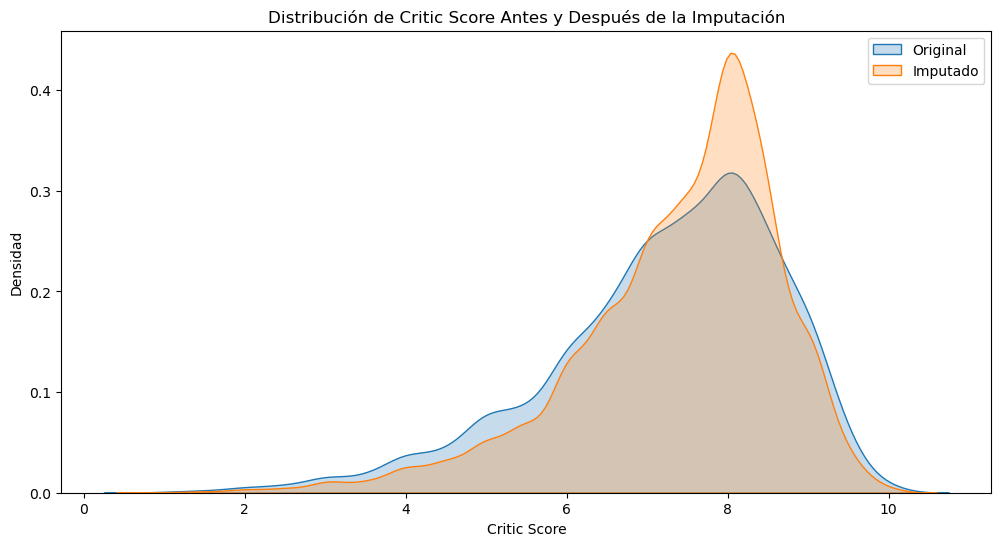

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# Comparar la distribución de 'critic_score' antes y después de la imputación
plt.figure(figsize=(12, 6))
sns.kdeplot(df['critic_score'], label='Original', shade=True)
sns.kdeplot(df_imputed['critic_score'], label='Imputado', shade=True)
plt.title('Distribución de Critic Score Antes y Después de la Imputación')
plt.xlabel('Critic Score')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [20]:
qsna=df_imputed.shape[0]-df_imputed.isnull().sum(axis=0)
qna=df_imputed.isnull().sum(axis=0)
ppna=round(100*(df_imputed.isnull().sum(axis=0)/df_imputed.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
jp_sales,11266,52750,82.40
critic_score,11351,52665,82.27
na_sales,15575,48441,75.67
pal_sales,15951,48065,75.08
other_sales,17800,46216,72.19
last_update,17879,46137,72.07
total_sales,20879,43137,67.38
release_date,56965,7051,11.01
img,64016,0,0.00
title,64016,0,0.00


### Detección de datos anómalos

Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un videojuego con ventas negativas).

In [21]:
# Identificar filas con ventas negativas
sales_columns = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
negative_sales = df[sales_columns] < 0
num_negative_sales = negative_sales.sum().sum()
print(f"Número total de ventas negativas: {num_negative_sales}")

Número total de ventas negativas: 0


In [22]:
# Identificar filas con puntuaciones fuera de rango (asumiendo puntajes hasta 10)
invalid_critic_score = df[(df['critic_score'] < 0) | (df['critic_score'] > 10)]
print(f"Registros con critic_score inválido: {invalid_critic_score.shape[0]}")
print(invalid_critic_score[['title', 'critic_score']])

Registros con critic_score inválido: 0
Empty DataFrame
Columns: [title, critic_score]
Index: []


In [26]:
# Identificar fechas futuras en última actualización
future_dates = df[df['last_update'] > pd.Timestamp.today()]
print(f"Número de registros con fechas de lanzamiento futuras: {future_dates.shape[0]}")


Número de registros con fechas de lanzamiento futuras: 0


## Exploración de datos con Python

### Visualizaciones exploratorias univariadas

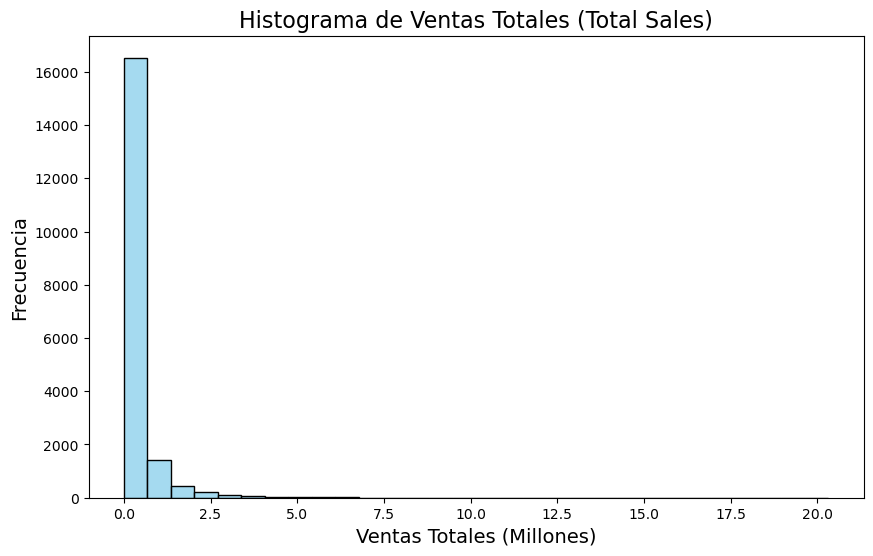

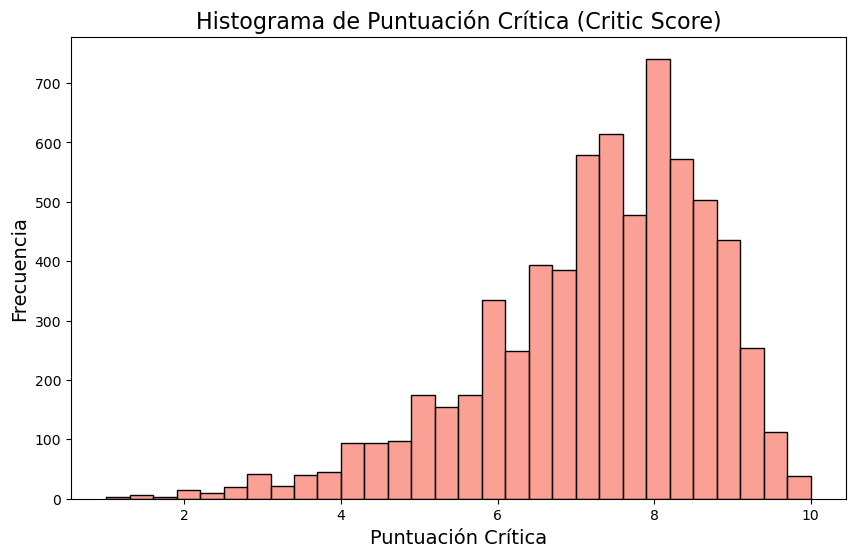

In [31]:
# Filtrar los valores no nulos de 'total_sales'
total_sales_no_na = df['total_sales'].dropna()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))
# Crear el histograma usando seaborn
sns.histplot(total_sales_no_na, bins=30, kde=False, color='skyblue')
# Añadir títulos y etiquetas
plt.title('Histograma de Ventas Totales (Total Sales)', fontsize=16)
plt.xlabel('Ventas Totales (Millones)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
# Mostrar el gráfico
plt.show()

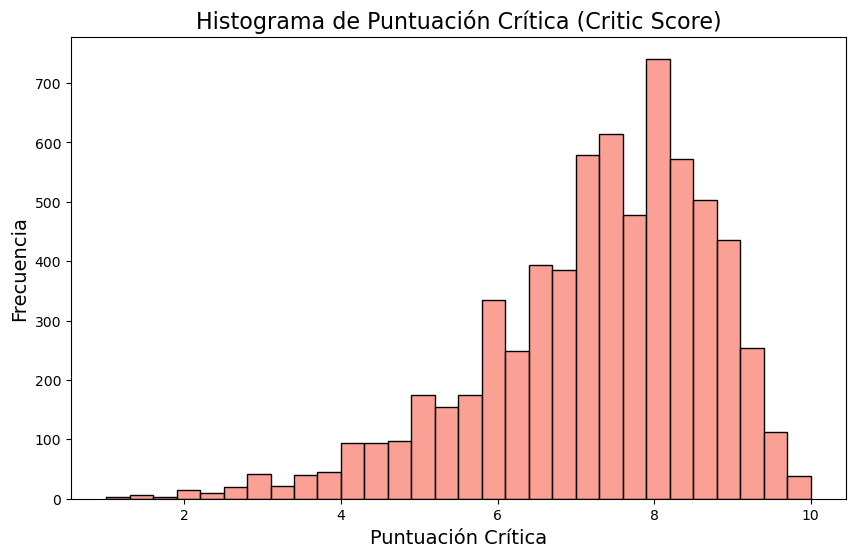

In [28]:
# Filtrar los valores no nulos de 'critic_score'
critic_score_no_na = df['critic_score'].dropna()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))
# Crear el histograma usando seaborn
sns.histplot(critic_score_no_na, bins=30, kde=False, color='salmon')
# Añadir títulos y etiquetas
plt.title('Histograma de Puntuación Crítica (Critic Score)', fontsize=16)
plt.xlabel('Puntuación Crítica', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
# Mostrar el gráfico
plt.show()

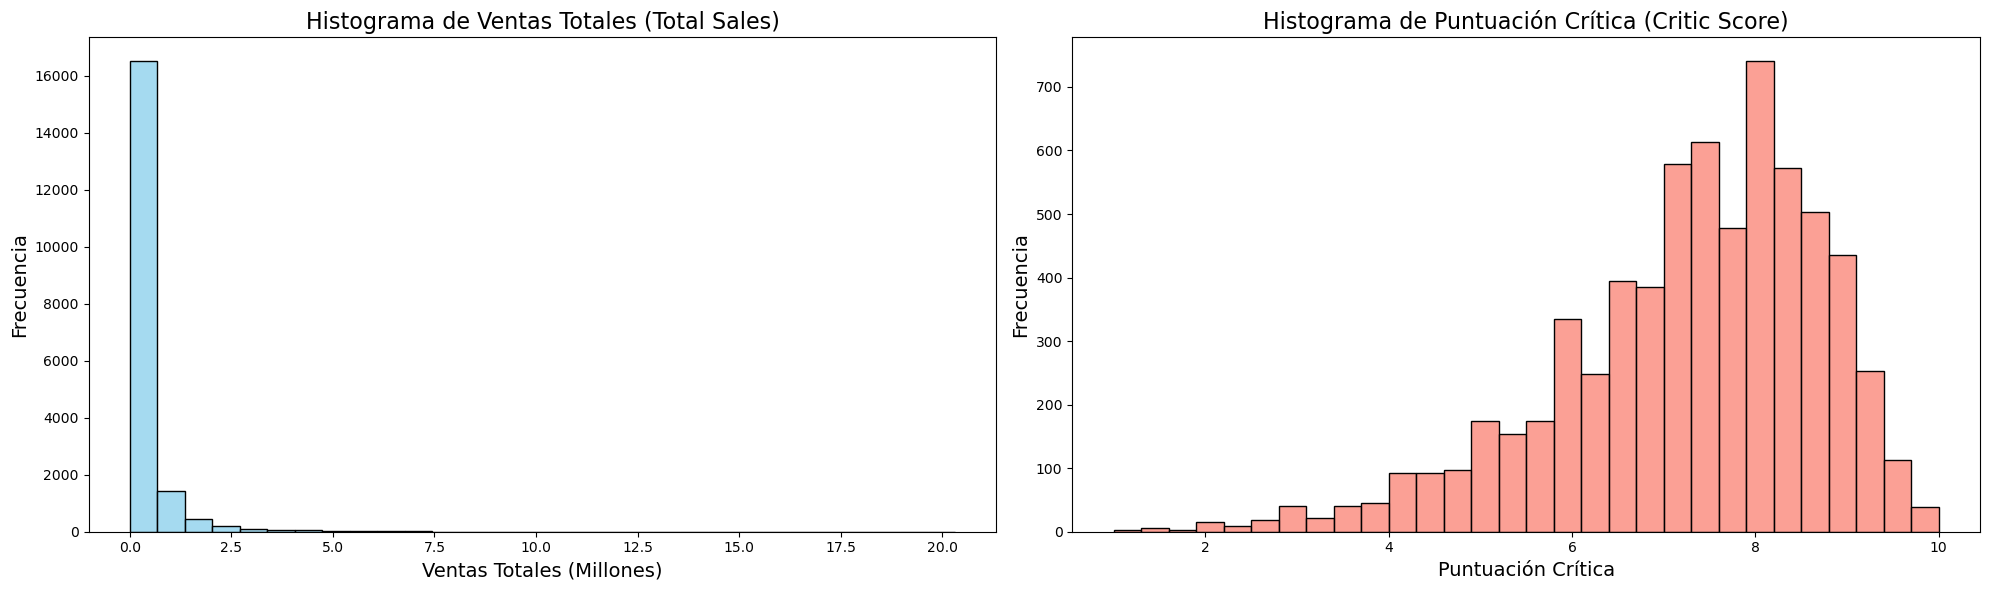

In [29]:
# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# Histograma de 'total_sales'
sns.histplot(total_sales_no_na, bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Histograma de Ventas Totales (Total Sales)', fontsize=16)
axes[0].set_xlabel('Ventas Totales (Millones)', fontsize=14)
axes[0].set_ylabel('Frecuencia', fontsize=14)
# Histograma de 'critic_score'
sns.histplot(critic_score_no_na, bins=30, kde=False, color='salmon', ax=axes[1])
axes[1].set_title('Histograma de Puntuación Crítica (Critic Score)', fontsize=16)
axes[1].set_xlabel('Puntuación Crítica', fontsize=14)
axes[1].set_ylabel('Frecuencia', fontsize=14)
# Ajustar el layout para evitar superposiciones
plt.tight_layout()
# Mostrar el gráfico
plt.show()

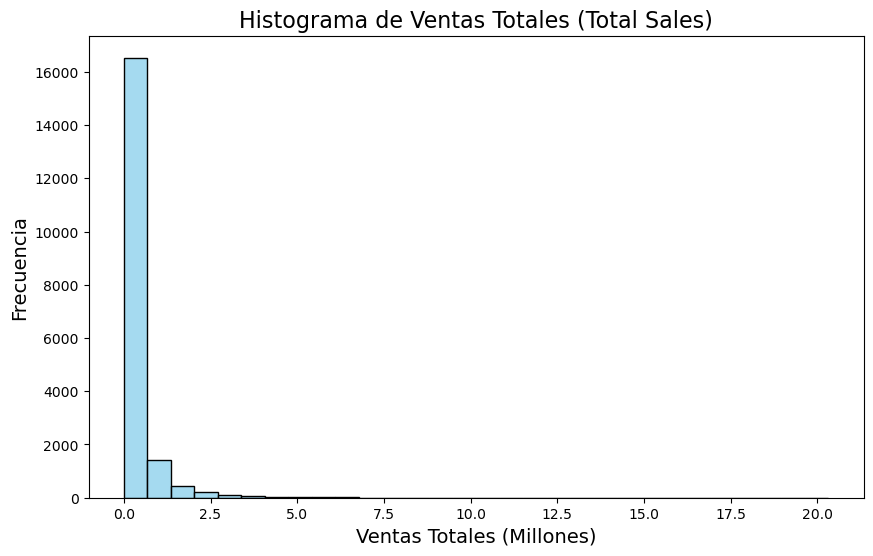

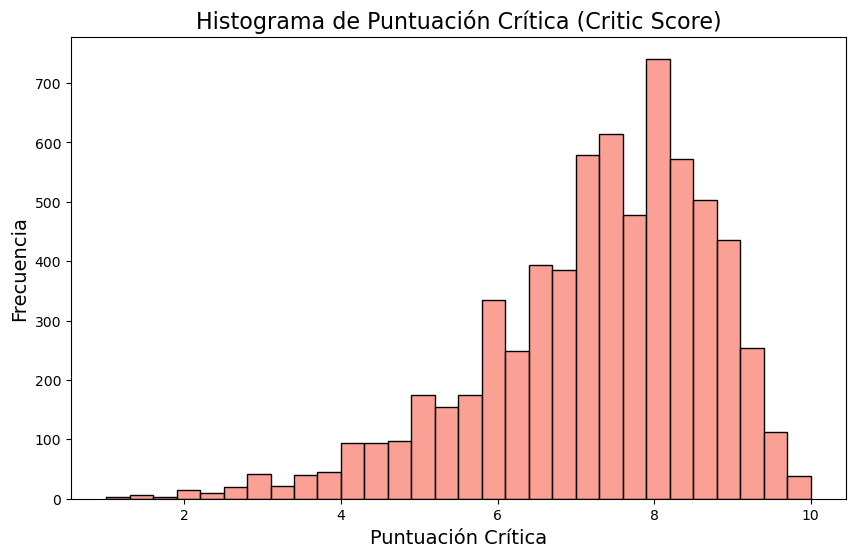

In [32]:
# Guardar el histograma de 'total_sales'
plt.figure(figsize=(10, 6))
sns.histplot(total_sales_no_na, bins=30, kde=False, color='skyblue')
plt.title('Histograma de Ventas Totales (Total Sales)', fontsize=16)
plt.xlabel('Ventas Totales (Millones)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.savefig('../data/kaggle/videojuegos/histograma_total_sales.png')
plt.show()
# Guardar el histograma de 'critic_score'
plt.figure(figsize=(10, 6))
sns.histplot(critic_score_no_na, bins=30, kde=False, color='salmon')
plt.title('Histograma de Puntuación Crítica (Critic Score)', fontsize=16)
plt.xlabel('Puntuación Crítica', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.savefig('../data/kaggle/videojuegos/histograma_critic_score.png')
plt.show()

### Visualizaciones exploratorias multivariadas

#### **Boxplots**

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_92299/623741881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='console', y='critic_score', data=df_box_console_critic, palette='Set2')


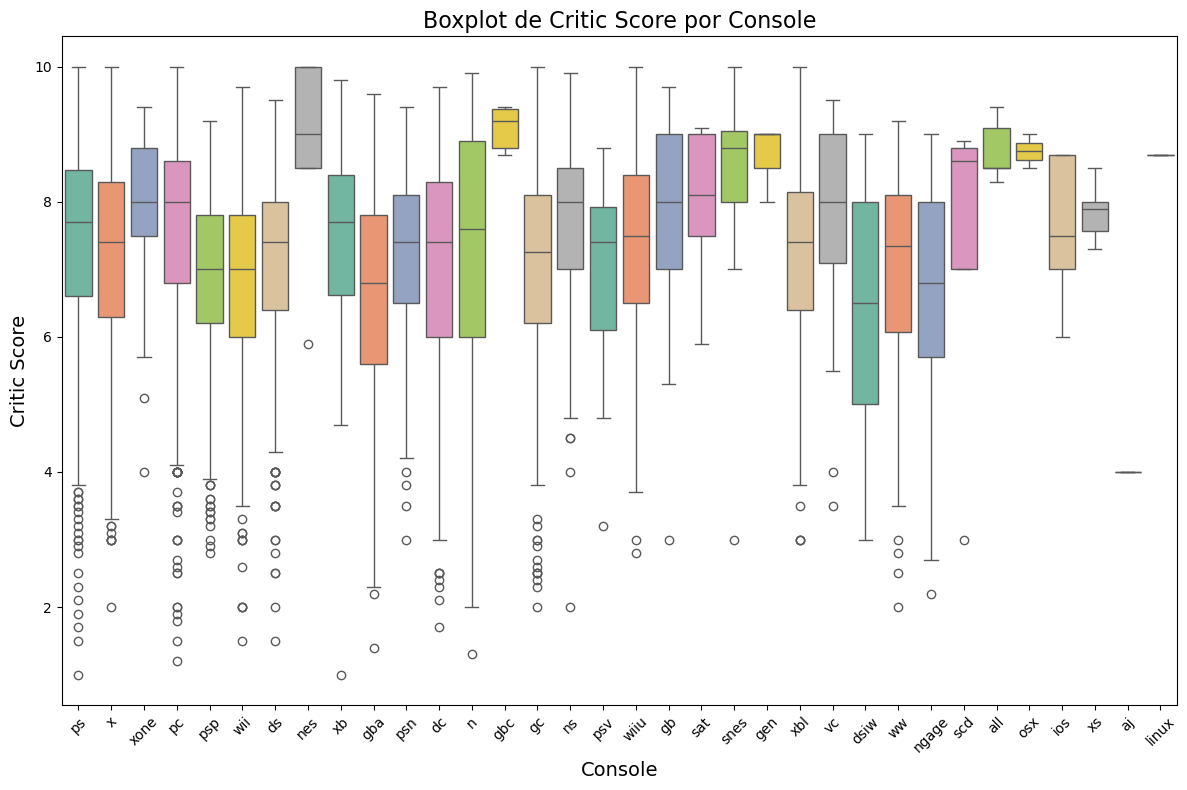

In [33]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_box_console_critic = df[['console', 'critic_score']].dropna()
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))
# Crear el boxplot usando seaborn
sns.boxplot(x='console', y='critic_score', data=df_box_console_critic, palette='Set2')
# Añadir títulos y etiquetas
plt.title('Boxplot de Critic Score por Console', fontsize=16)
plt.xlabel('Console', fontsize=14)
plt.ylabel('Critic Score', fontsize=14)
# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_92299/1899870100.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='critic_score', data=df_box_genre_critic, palette='Pastel1')


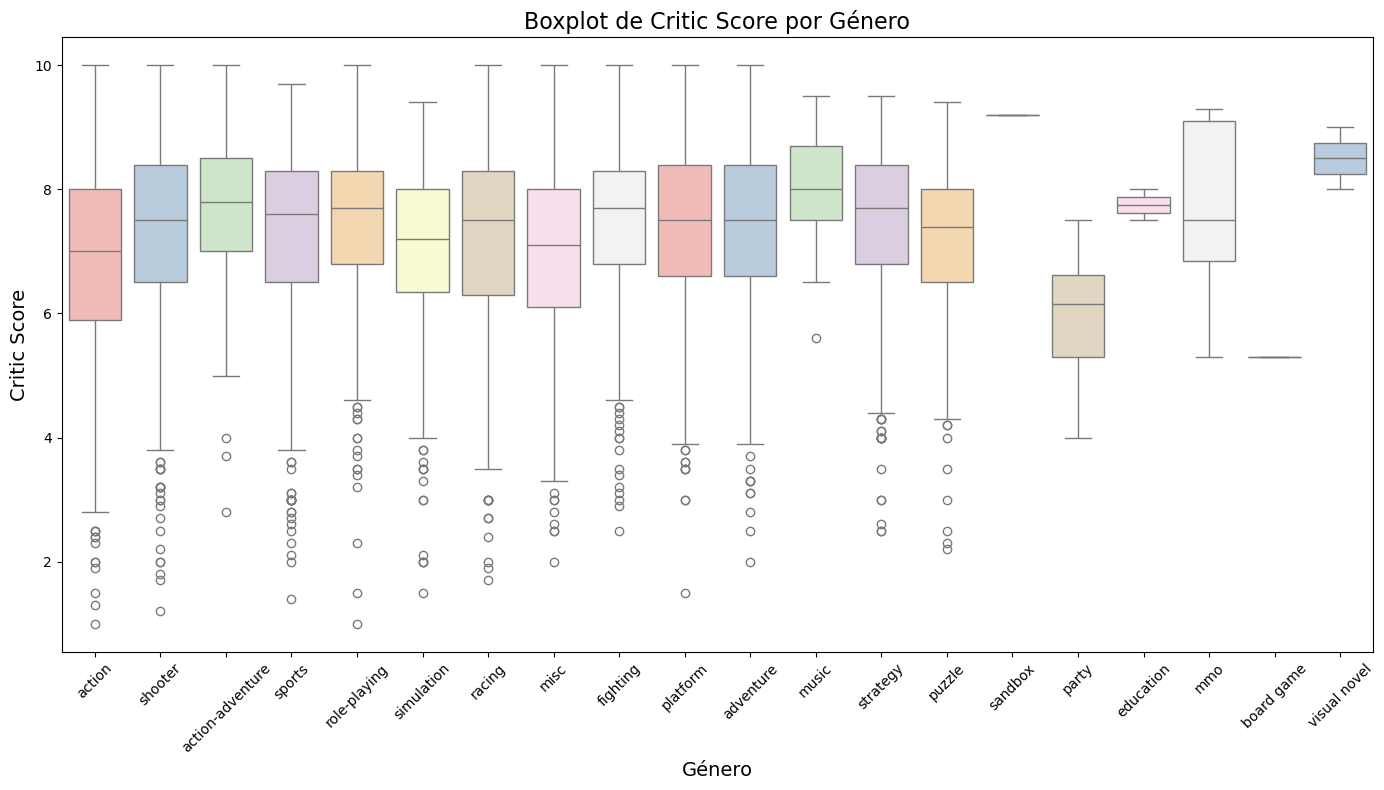

In [35]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_box_genre_critic = df[['genre', 'critic_score']].dropna()
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))
# Crear el boxplot usando seaborn
sns.boxplot(x='genre', y='critic_score', data=df_box_genre_critic, palette='Pastel1')
# Añadir títulos y etiquetas
plt.title('Boxplot de Critic Score por Género', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Critic Score', fontsize=14)
# Rotar etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### **Diagrama de dispersión**

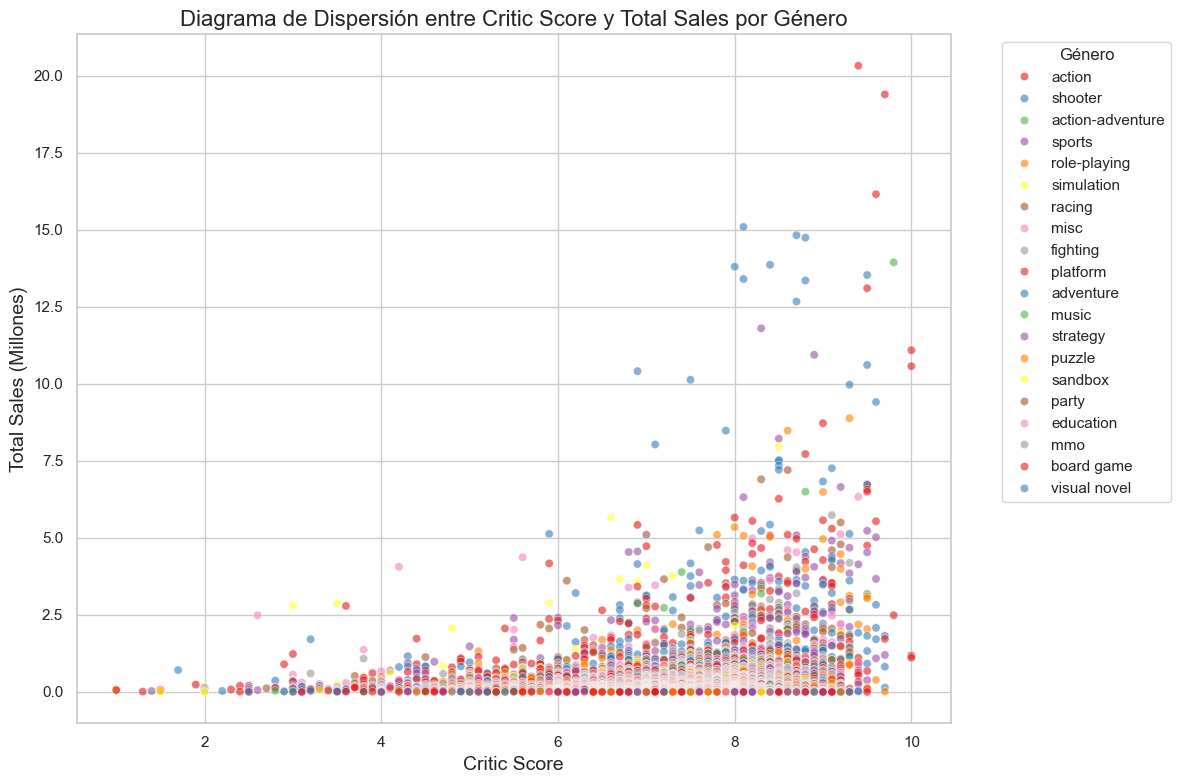

In [63]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_scatter_genre = df[['critic_score', 'total_sales', 'genre']].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(x='critic_score', y='total_sales', hue='genre', data=df_scatter_genre, alpha=0.6, palette='Set1')

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión entre Critic Score y Total Sales por Género', fontsize=16)
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales (Millones)', fontsize=14)

# Mostrar la leyenda
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


#### Mejoras alternativas no requeridas: Uso de sub-plots

In [40]:
# Definir la columna de categoría
category_col = 'genre' 
# Agrupar por la categoría y calcular la cantidad y el monto total de ventas
summary = df.groupby(category_col).agg(
    cantidad_ventas=pd.NamedAgg(column='total_sales', aggfunc='count'),  # Número de videojuegos vendidos
    monto_total=pd.NamedAgg(column='total_sales', aggfunc='sum')         # Ingresos totales
).reset_index()
# Revisar si hay valores nulos en la tabla resumen
print(summary.isnull().sum())
# Opcional: Ordenar la tabla por monto total descendente
summary_sorted = summary.sort_values(by='monto_total', ascending=False)
# Mostrar la tabla ordenada
print(summary_sorted)

genre              0
cantidad_ventas    0
monto_total        0
dtype: int64
               genre  cantidad_ventas  monto_total
17            sports             2597      1187.51
0             action             2839      1125.89
15           shooter             1485       995.50
6               misc             2004       557.79
12            racing             1431       525.75
13      role-playing             1491       426.80
10          platform              951       349.15
5           fighting              871       341.13
2          adventure             1893       325.39
16        simulation             1121       300.65
1   action-adventure              264       148.52
11            puzzle              723       127.28
18          strategy              820       118.31
8              music              147        51.75
7                mmo               30         9.31
9              party               29         6.21
19      visual novel              218         5.78
14    

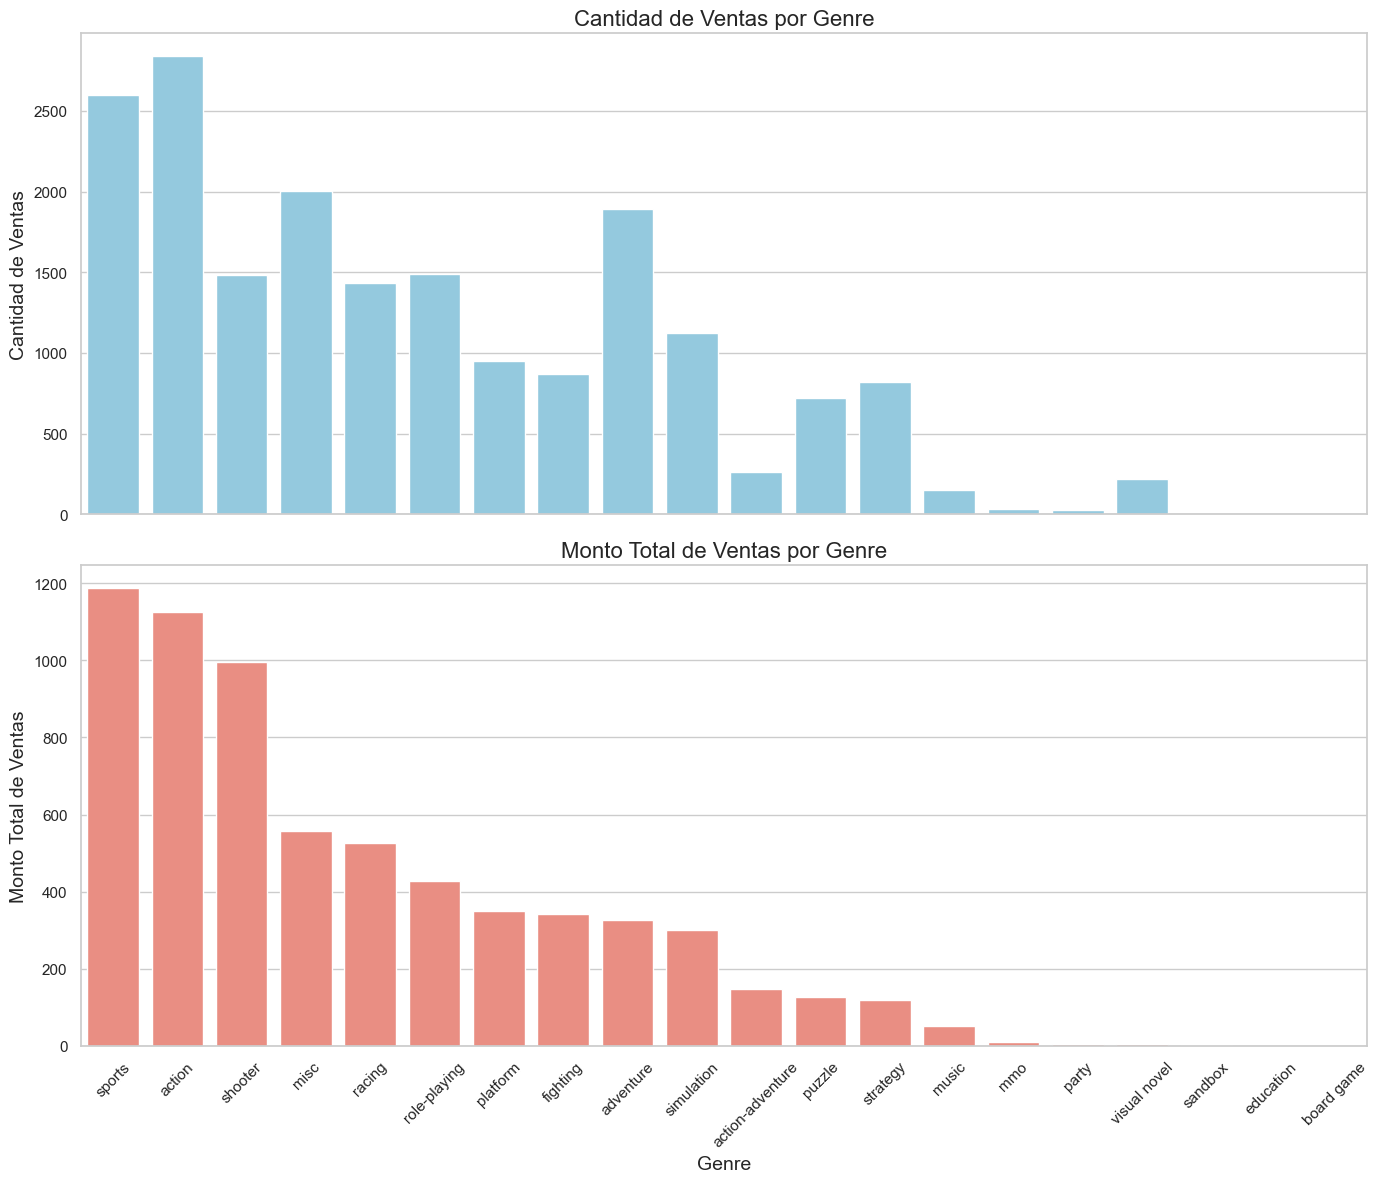

In [48]:
# Crear una figura con dos subplots verticales
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)
# Primer subplot: Cantidad de Ventas
sns.barplot(
    x=category_col,
    y='cantidad_ventas',
    data=summary_sorted,
    color='skyblue',
    ax=axes[0]
)
axes[0].set_title(f'Cantidad de Ventas por {category_col.capitalize()}', fontsize=16)
axes[0].set_ylabel('Cantidad de Ventas', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
# Segundo subplot: Monto Total de Ventas
sns.barplot(
    x=category_col,
    y='monto_total',
    data=summary_sorted,
    color='salmon',
    ax=axes[1]
)
axes[1].set_title(f'Monto Total de Ventas por {category_col.capitalize()}', fontsize=16)
axes[1].set_ylabel('Monto Total de Ventas', fontsize=14)
axes[1].set_xlabel(f'{category_col.capitalize()}', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
# Ajustar el layout
plt.tight_layout()
# Mostrar el gráfico
plt.show()


Número de videojuegos con ventas > 2.5 millones: 354


/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_92299/3025945138.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_92299/3025945138.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')


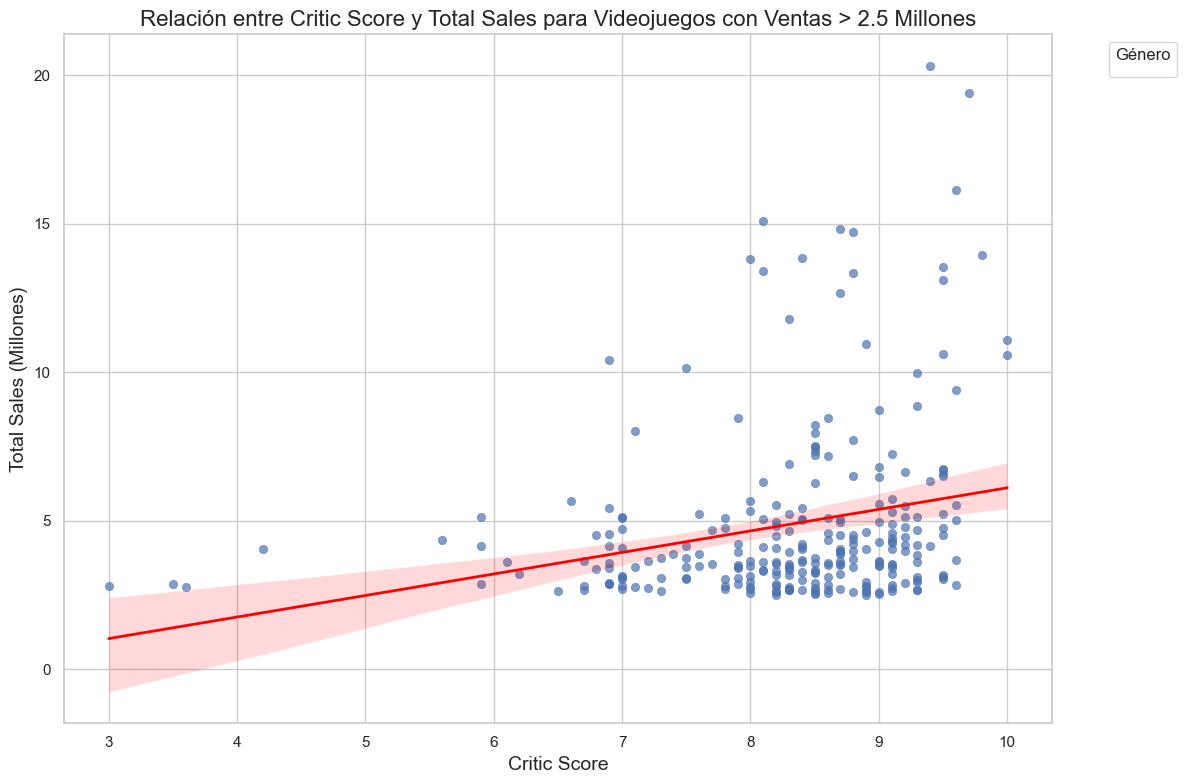

In [57]:
# Definir el umbral de ventas
umbral_ventas = 2.5
# Filtrar los videojuegos que han vendido más de 2.5 millones
df_filtrado = df[df['total_sales'] > umbral_ventas]
# Mostrar cuántos videojuegos cumplen con el criterio
print(f"Número de videojuegos con ventas > {umbral_ventas} millones: {df_filtrado.shape[0]}")
df_scatter = df_filtrado[['critic_score', 'total_sales']].dropna()
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))
# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x='critic_score',
    y='total_sales',
    data=df_scatter,
    palette='viridis',    # Esquema de colores
    alpha=0.7,            # Transparencia de los puntos
    edgecolor=None        # Sin borde en los puntos
)
# Añadir una línea de regresión
sns.regplot(
    x='critic_score',
    y='total_sales',
    data=df_scatter,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)
# Añadir títulos y etiquetas
plt.title('Relación entre Critic Score y Total Sales para Videojuegos con Ventas > 2.5 Millones', fontsize=16)
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales (Millones)', fontsize=14)
# Mostrar la leyenda
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
# Ajustar el layout para evitar superposiciones
plt.tight_layout()
# Mostrar el gráfico
plt.show()

Número de videojuegos con ventas > 2.5 millones: 18565


/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_92299/1958783741.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_92299/1958783741.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')


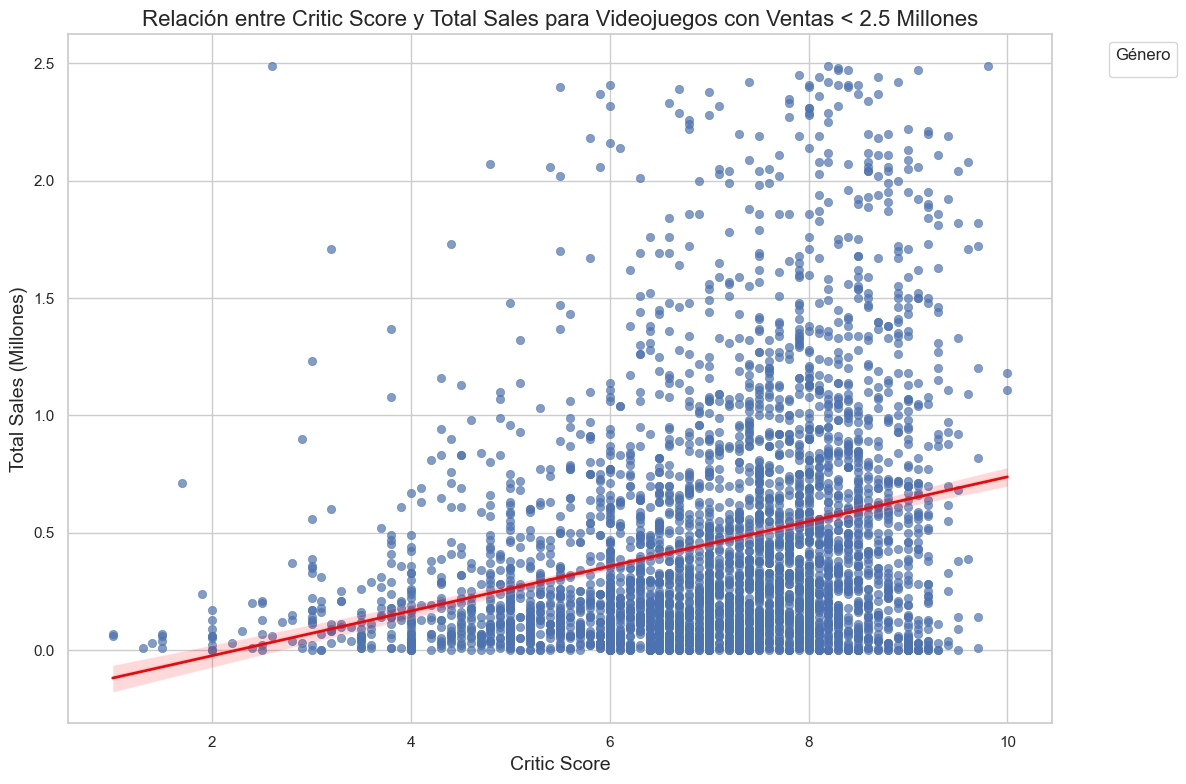

In [56]:
# Definir el umbral de ventas
umbral_ventas = 2.5
# Filtrar los videojuegos que han vendido menos de 2.5 millones
df_filtrado = df[df['total_sales'] < umbral_ventas]
# Mostrar cuántos videojuegos cumplen con el criterio
print(f"Número de videojuegos con ventas > {umbral_ventas} millones: {df_filtrado.shape[0]}")
df_scatter = df_filtrado[['critic_score', 'total_sales']].dropna()
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))
# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x='critic_score',
    y='total_sales',
    data=df_scatter,
    palette='viridis',    # Esquema de colores
    alpha=0.7,            # Transparencia de los puntos
    edgecolor=None        # Sin borde en los puntos
)
# Añadir una línea de regresión
sns.regplot(
    x='critic_score',
    y='total_sales',
    data=df_scatter,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)
# Añadir títulos y etiquetas
plt.title('Relación entre Critic Score y Total Sales para Videojuegos con Ventas < 2.5 Millones', fontsize=16)
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales (Millones)', fontsize=14)
# Mostrar la leyenda
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
# Ajustar el layout para evitar superposiciones
plt.tight_layout()
# Mostrar el gráfico
plt.show()

## **Análisis adicional**


#### Estadísticas descriptivas

Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

In [58]:
# Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas identificadas:")
print(columnas_numericas)


Columnas numéricas identificadas:
['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']


In [60]:
def calcular_estadisticas(column, data):
    """
    Calcula estadísticas descriptivas para una columna numérica,
    omitiendo los valores nulos.

    Parámetros:
    - column (str): Nombre de la columna.
    - data (pd.Series): Serie de pandas con los datos de la columna.

    Retorna:
    - dict: Diccionario con las estadísticas calculadas.
    """
    estadisticas = {
        'Cuenta': int(np.sum(~np.isnan(data))),
        'Media': np.nanmean(data),
        'Mediana': np.nanmedian(data),
        'Desviación Estándar': np.nanstd(data, ddof=1),
        'Mínimo': np.nanmin(data),
        'Máximo': np.nanmax(data),
        '25% Percentil': np.nanpercentile(data, 25),
        '75% Percentil': np.nanpercentile(data, 75)
    }
    return estadisticas

# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in columnas_numericas:
    datos_columna = df[columna].values
    estadisticas = calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
critic_score,6678.0,7.22,7.50,1.46,1.0,10.00,6.40,8.30
total_sales,18922.0,0.35,0.12,0.81,0.0,20.32,0.03,0.34
na_sales,12637.0,0.26,0.12,0.49,0.0,9.76,0.05,0.28
jp_sales,6726.0,0.10,0.04,0.17,0.0,2.13,0.02,0.12
pal_sales,12824.0,0.15,0.04,0.39,0.0,9.85,0.01,0.14
other_sales,15128.0,0.04,0.01,0.13,0.0,3.12,0.00,0.03


#### Análisis de correlación

Identifica y analiza las correlaciones más fuertes entre las variables del dataset.

In [61]:
# Calcular la matriz de correlación utilizando Pearson
matriz_correlacion = df[columnas_numericas].corr(method='pearson')
# Mostrar la matriz de correlación
print("\nMatriz de Correlación (Pearson):")
matriz_correlacion


Matriz de Correlación (Pearson):


,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
critic_score,1.000000,0.281166,0.300289,0.147448,0.246694,0.243847
total_sales,0.281166,1.000000,0.914149,0.212469,0.907421,0.859329
na_sales,0.300289,0.914149,1.000000,0.065091,0.684517,0.687512
jp_sales,0.147448,0.212469,0.065091,1.000000,0.131796,0.082653
pal_sales,0.246694,0.907421,0.684517,0.131796,1.000000,0.817030
other_sales,0.243847,0.859329,0.687512,0.082653,0.817030,1.000000


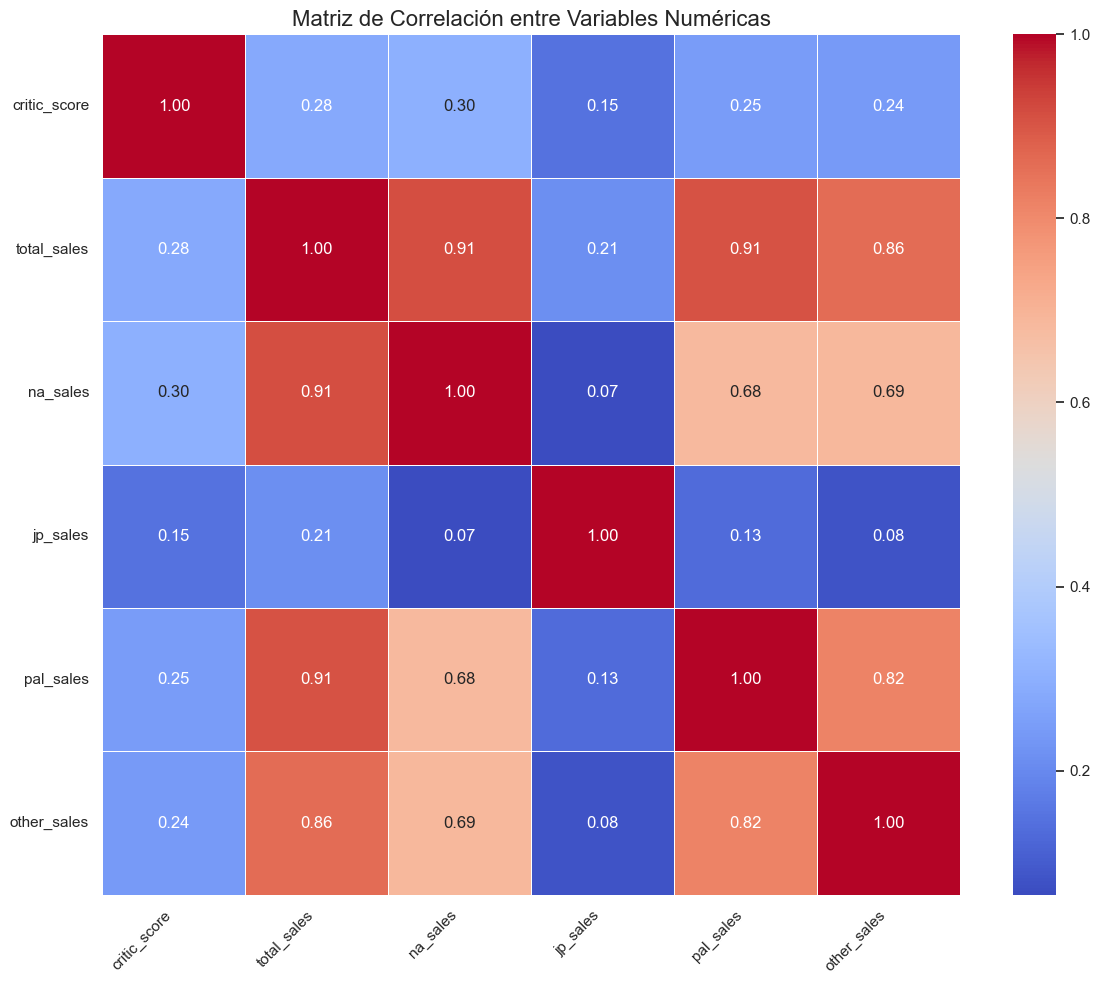

In [62]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))
# Crear el heatmap utilizando seaborn
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# Añadir títulos y etiquetas
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# Mostrar el gráfico
plt.tight_layout()
plt.show()